
# Project: Medical Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction


> This project investigates the factors that affect patients honouring their medical appointments in Brazil. The dependent variable 'Noshow' would be compared aganist other independent variables to show the determinants for a patient meeting an appointment.

### The questions to be answered

* Do paying medical bills by the government for patients make them to show up for their appointment? 
* Are patients that show up for their appointments more than the ones that did not show up? By how much?
* Do patient who receive SMS from the hospital more likely to show up for their appointment or not?
* Are male patients more likely to show up than female patients?
* What age bracket are prone to honouring their invitation?

## Limitations

+ The day of appointment and schedules were not considered in the analysis, so the columns were dropped.
+ The patient ID and appointent ID was also not considered
+ The neighbourhood feature was neglected.


In [2]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In [3]:
df = pd.read_csv('appointment_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Exploring and cleaning the medical appointment Data to suit our analysis

In [4]:
#exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> As indicated above, the data has **110527** records of patients and **14** features about each of them. There are no null values in the data.

> There are some corrections to make in the column headings - **Hipertension** and **Handcap** were not correctly spelt.

> To make analysis easier when using column names, all column heading would be converted to lowercase and concatenated with underscore for those containing two words. The **'No-show'** heading would be changed to **'no_show'**.

In [4]:
# Droping the columns
# Rename the columns
# Converting the column headings to lowercase
df.drop(columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay', 'Neighbourhood'], inplace=True)
df.rename({'No-show':'No_show','Hipertension':'Hypertension','Handcap':'Handicap'}, axis=1, inplace=True)
df.columns = df.columns.str.lower()
df.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [6]:
# observing a brief statistics of the data
df.describe()


,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is a negative value for age as seen above, which could be most likely a typographical error. Let's query for negative values of age to know the number of occurences.

It's also clear that scholarship, hypertension, diabetes, alcoholism and sms_received have min and max values {0,1}, whereas handicap has min and max values {0,4}. We would confirm the number of distinct values in this range later on.

In [7]:
# Finding the number of occurences of negative age entries
df.query('age < 0')

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,F,-1,0,0,0,0,0,0,No


As seen above, there is just one occurence of the negative age. So, we could just conclude it's a typo error and drop the entry.

In [5]:
#dropping the negative age entry
df.drop(df.index[df.age < 0], inplace = True)
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Taking the statistics again shows a min value of zero for age which also looks doubtful. Let's see the number of occurences first.

In [9]:
# finding number of patients with zero age.
df.query('age == 0').shape[0]

3539

There are 3539 patients with zero age. We would assume that they are babies less than a year old.

In [6]:
#checking the distinct values on the columns
cols = ['scholarship','hypertension','diabetes','alcoholism','handicap','sms_received', 'no_show', 'gender']

df[cols].apply(lambda x: print('Unique values in {} => {}'.format(x.name,x.unique())));

Unique values in scholarship => [0 1]
Unique values in hypertension => [1 0]
Unique values in diabetes => [0 1]
Unique values in alcoholism => [0 1]
Unique values in handicap => [0 1 2 3 4]
Unique values in sms_received => [0 1]
Unique values in no_show => ['No' 'Yes']
Unique values in gender => ['F' 'M']


The handicap column has four distinct values which could mean different levels or types of handicap.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Do paying medical bills by the government for patients make them to show up for their appointment?)

In [5]:
# creating a list of show and noshow entries
show = df.no_show == 'No'
noshow = df.no_show == 'Yes'

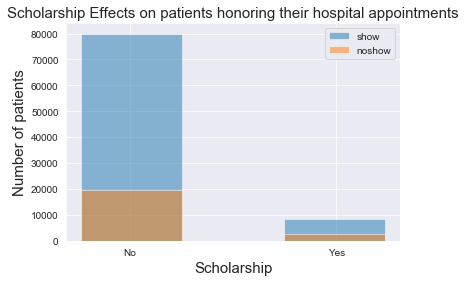

In [19]:
#Plot of Effect of Scholarship
df.scholarship[show].hist(label='show',alpha = 0.5, bins = 3)
df.scholarship[noshow].hist(label='noshow',alpha = 0.5, bins = 3);
plt.title('Scholarship Effects on patients honoring their hospital appointments',fontsize=15)
plt.xlabel('Scholarship',fontsize=15)
plt.ylabel('Number of patients',fontsize=15);
plt.xticks([0.16,0.84],['No','Yes'])
plt.legend();

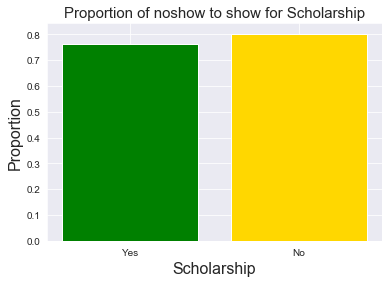

In [18]:
Yes_scholar_prop = df[show].query('scholarship  == 1').shape[0]/df.query('scholarship == 1').shape[0]
No_scholar_prop = df[show].query('scholarship == 0').shape[0]/df.query('scholarship == 0').shape[0]
plt.bar([1,2],[Yes_scholar_prop,No_scholar_prop],color=['green','gold'])
locs,label = plt.xticks() #get the xtick locations
plt.xticks([locs[2],locs[6]],['Yes','No'])#align the xtick labels with the center of the bars
plt.xlabel('Scholarship',fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.title('Proportion of noshow to show for Scholarship',fontsize=15);

The distribution above shows that 75% of patients with scholarship honoured their appointment, compared to 80% of students without scholarship.

### Research Question 2 (Are patients that show up for their appointments more than the ones that did not show up? By how much?)

In [14]:
# By what value are patients that showed up higher    
df[df['no_show'] == 'No'].shape[0] - df[df['no_show'] == 'Yes'].shape[0]

65888

> There are 65888 more patients that showed up for their appointments. Let's have a visualization below

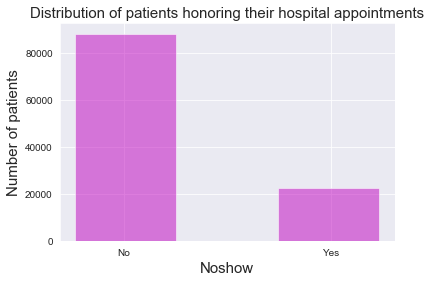

In [17]:
#Patients' showing up for appointment distribution
df['no_show'].hist(alpha=0.5,color='m',bins=3);
plt.xticks([0.16,0.84]);
plt.title('Distribution of patients honoring their hospital appointments',fontsize=15)
plt.xlabel('Noshow',fontsize=15)
plt.ylabel('Number of patients',fontsize=15);
sns.set_style('darkgrid')

### Research Question 3  (Do patient who receive SMS from the hospital more likely to show up for their appointment or not?)

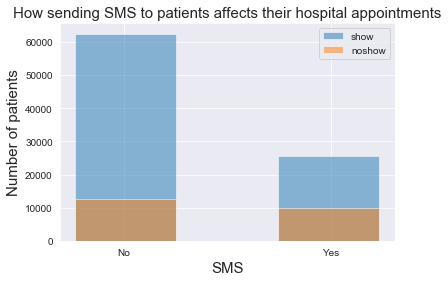

In [20]:
#Ploting the effect of SMS
df.sms_received[show].hist(label='show',alpha = 0.5, bins = 3)
df.sms_received[noshow].hist(label='noshow',alpha = 0.5, bins = 3);
plt.title('How sending SMS to patients affects their hospital appointments',fontsize=15)
plt.xlabel('SMS',fontsize=15)
plt.ylabel('Number of patients',fontsize=15);
plt.xticks([0.16,0.84],['No', 'Yes'])
plt.legend();

> From the above graph, although there are more patients showing up for their appointment due to SMS, patients who did not get SMS are more likely to honour their appointments. 

### Research Question 4  (Are male patients more likely to show up than female patients?)

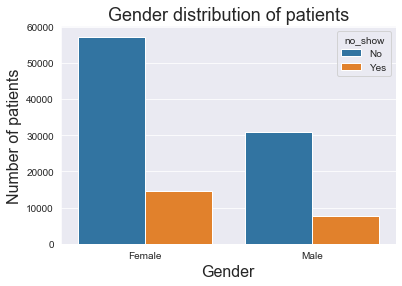

In [23]:
# Plotting a distribution of show/noshow for gender using seaborn plot
ax = sns.countplot(x= df.gender ,hue = df.no_show,data = df)
ax.set_xticklabels(['Female', 'Male'])
ax.set_ylabel('Number of patients',fontsize=16);
ax.set_xlabel('Gender',fontsize=16)
ax.set_title('Gender distribution of patients', fontsize=18);

From the distribution above, female patients, are more likely to honor their invitation than male patients. However, let's plot a proportion of noshow to show of both gender to have more insight.

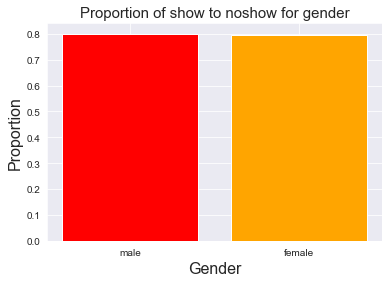

In [22]:
female_prop = df[show].query('gender == "F"').shape[0]/df.query('gender == "F"').shape[0]
male_prop = df[show].query('gender == "M"').shape[0]/df.query('gender == "M"').shape[0]
plt.bar([1,2],[male_prop,female_prop],color=['r','orange'])
locs,label = plt.xticks() #get the xtick locations
plt.xticks([locs[2],locs[6]],['male','female'])#align the xtick labels with the center of the bars
plt.xlabel('Gender',fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.title('Proportion of show to noshow for gender',fontsize=15);

The proportion distribution shows an almost equal correlation. So, gender may not have a significat effect on the way patients honour their appointments.

### Research Question 5  (What age bracket are prone to honouring their invitation?)

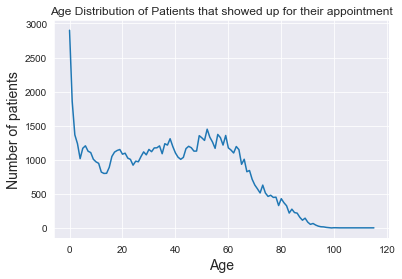

In [21]:
show_age = df[show].groupby('age').size()
plt.plot(show_age.index,show_age)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of patients',fontsize=14)
plt.title('Age Distribution of Patients that showed up for their appointment');

> There is a negative correlation between age and patients that showed up for appointment.

<a id='conclusions'></a>
## Conclusions

> There are 65888 more patients that honoured their appointment.

> Young patients are more likely to show up for their appointments.

> Patients without medical cover by the government seems more likely to honour their appointment. No information was provided on whether the medical cover is all-inclusive.

> Gender may not be a significant factor in determining whether a patient shows up for an appointment or not.

> Patients who didn't receive SMS seem more likely to honour their appointments. We have no information on the type of message the patients received, as reminder messages should cause patients to show up for their appointments.
